<a href="https://colab.research.google.com/github/kaonmir/I-want-to-study-Data-Science/blob/master/06_Logistic_regression_for_a_binary_classification_using_a_high_dimensional_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
data = pd.read_csv("https://raw.githubusercontent.com/kaonmir/MachineLearningAssignment/master/06.%20data.txt?token=AJWECOCDKA5WE7JMN2ARCD26UDDPK",
                   names=['X0', 'X1', 'label'], header=None, dtype=np.float64)
X0 = data['X0']
X1 = data['X1']
label = data['label']

## 1. Plot the training data

* plot the training data points (x,y) with their labels l in colors (blue for label 0 and red for label 1)

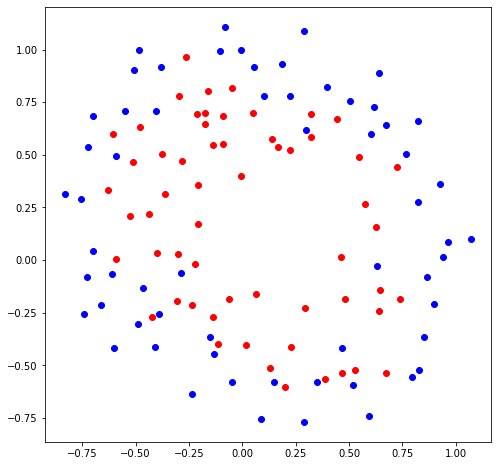

In [28]:
plt.figure(figsize=(8, 8))
plt.scatter(X0[label==0], X1[label==0], c='b')
plt.scatter(X0[label==1], X1[label==1] , c='r')
plt.show()

## 2. Write down the high dimensional function g(x, y; θ)

* write down the equation for the non-linear function g(x, y; θ) used for the classifier
* z=g(x, y; θ), where $g$ is a high dimensional function and $θ∈R^{16}$

### Predefinded Function
* sigmoid(x): sigmoid value
* cal_cost(theta, X, y): cost
* gradient_descent(X, y, theta,learning_rate=0.01, iterations=100): tuple(theta, cost_history, theta_history)

In [0]:
def sigmoid(x):
  try:
    return 1 / (1 +np.exp(-x))
  except:
    return 1e9

In [0]:
def cal_cost(_theta, _X, _Y):
  m = len(_X)
  z = X.dot(_theta)
  h = sigmoid(z)

  J = -(1.0/m) * (_Y.T.dot(np.log(h))+(1-_Y).T.dot(np.log(1-h)))
  return J.item()

In [0]:
def gradient_descent(_X, _Y, _theta, lr=0.01, iterations=100):
  cost_history = np.zeros(iterations)
  theta_history = np.zeros((iterations, theta.size))

  m = len(X)
  z = _X.dot(_theta)
  h = sigmoid(z)

  for it in range(iterations):
    theta_history[it, :] = _theta.T
    cost_history[it] = cal_cost(_theta, _X, _Y)

    _theta = _theta - (lr/m) * _X.T.dot(h - _Y)

  return _theta, cost_history, theta_history

### Remake $X$ to be $f_k(x, y)$
* That 16 functions will be

| |  |  | |
|----------|-------- | -------  | -------  | 
|  1      |   $x$   |    $y$   |  $x+y$   |
| $xy$    |   $x^2$ |   $y^2$  |  $x^2y$  |
| $xy^2$  |$x^2y^2$ |   $x^3y$ |  $xy^3$  |
|  $x^3$  |   $y^3$ |$x^2+y^2$ |$x^3+y^3$ | 

In [0]:
X = np.c_[np.ones((len(X0), 1)), X0, X1, X0+X1,
          X0*X1, X0**2, X1**2, (X0**2)*X1,
          X0*(X1**2), (X0**2)*(X1**2), (X0**3)*X1, X0*(X1**3),
          X0**3, X1**3, (X0**2)+(X1**2), (X0**3)+(X1**3)]
Y = label.to_numpy().reshape(len(label), 1)

### Making result and plotting

In [0]:
lr = 0.0002
n_iter = 20000
theta = np.array([0]*16).reshape((16, 1))

theta, cost_history, theta_history = gradient_descent(X, Y, theta, lr, n_iter)

## 3. Plot the training error

* plot the training error J(θ) at every iteration of gradient descent until convergence (in blue color)

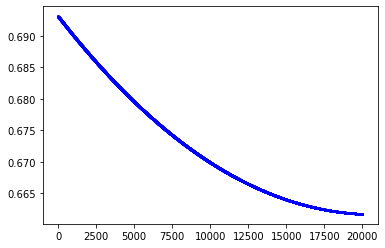

In [69]:
plt.figure()
plt.scatter(range(len(cost_history)), cost_history, c='b', s=1)